In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [7]:
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [8]:
data = pd.read_csv('50_startups.csv')

In [10]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Data Cleaning

In [12]:
data = data.drop(['State'],axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [14]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [15]:
#Renaming the columns

data = data.rename({'R&D Spend':'R&D_spend','Marketing Spend':'Marketing_spend'},axis=1)

In [16]:
data.tail()

,R&D_spend,Administration,Marketing_spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [17]:
data.isna().sum()

R&D_spend          0
Administration     0
Marketing_spend    0
Profit             0
dtype: int64

# EDA and Data visualization

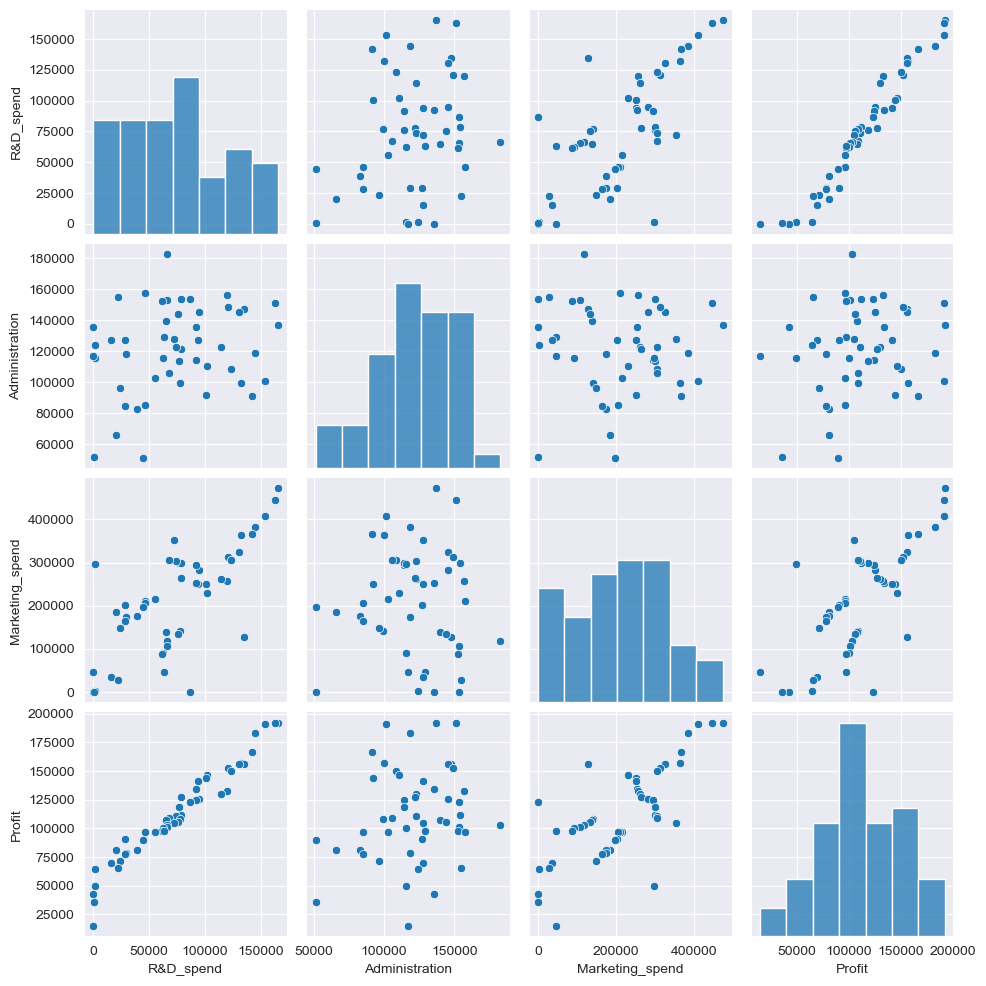

In [18]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x236a0aaf990>,
 'caps': [<matplotlib.lines.Line2D at 0x236a0b72790>,
 'boxes': [<matplotlib.lines.Line2D at 0x236a0b70dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x236a0b737d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x236a0b84050>],
 'means': []}

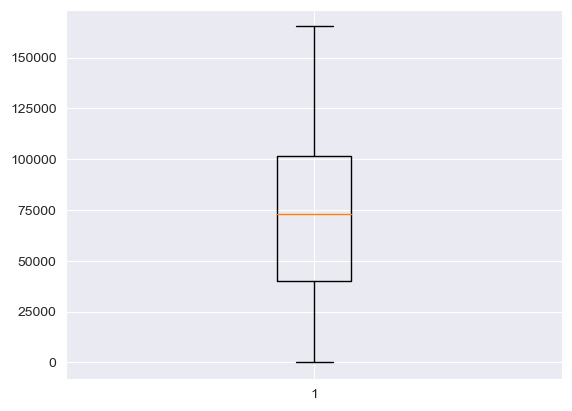

In [19]:
plt.boxplot(data['R&D_spend'],vert = True)

In [20]:
data[data.duplicated()]

,R&D_spend,Administration,Marketing_spend,Profit


In [21]:
data = data.rename({'R&D_spend':'spend'},axis=1)

# Building a model

In [22]:
import statsmodels.formula.api as smf

model = smf.ols('Profit~spend+Administration+Marketing_spend',data=data).fit()

In [23]:
model.params

Intercept          50122.192990
spend                  0.805715
Administration        -0.026816
Marketing_spend        0.027228
dtype: float64

In [24]:
(model.tvalues,model.pvalues)

(Intercept           7.626218
 spend              17.846374
 Administration     -0.525507
 Marketing_spend     1.655077
 dtype: float64,
 Intercept          1.057379e-09
 spend              2.634968e-22
 Administration     6.017551e-01
 Marketing_spend    1.047168e-01
 dtype: float64)

# Building SLR and MLR models for Administration and marketing spend as it's values are greater than 0.05

In [25]:
model_a = smf.ols('Profit~Administration',data=data).fit()

In [26]:
model_a.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [27]:
model_a.tvalues,model_a.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [28]:
model_m = smf.ols('Profit~Marketing_spend',data=data).fit()

In [29]:
model_m.tvalues,model_m.pvalues

(Intercept          7.808356
 Marketing_spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_spend    4.381073e-10
 dtype: float64)

In [30]:
#markrting spend has significant value as it's value is less than 0.05

# Model validation

Two Techniques:- 1.Collinearity Check & 2.Residual analysis

In [31]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("spend~Administration+Marketing_spend",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~spend+Marketing_spend",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing_spend~spend+Administration",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['spend','Administration','Marketing_spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,spend,2.468903
1,Administration,1.175091
2,Marketing_spend,2.326773


In [32]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

In [33]:
import statsmodels.api as sm

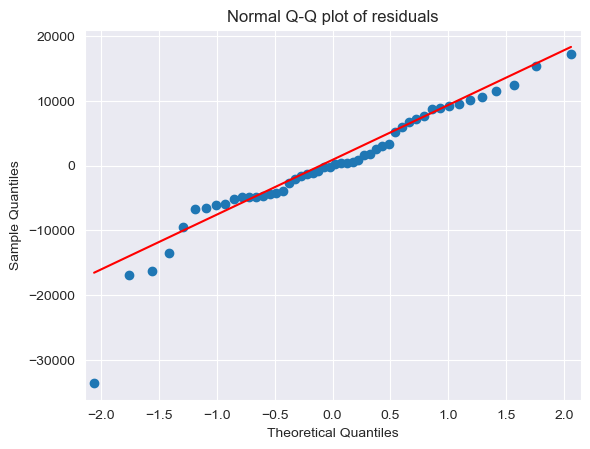

In [34]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [36]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

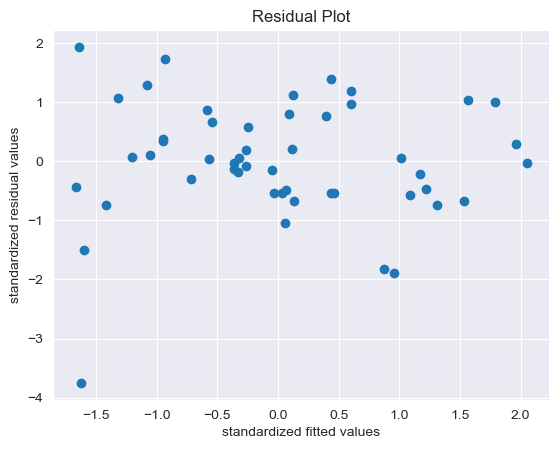

In [37]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [38]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


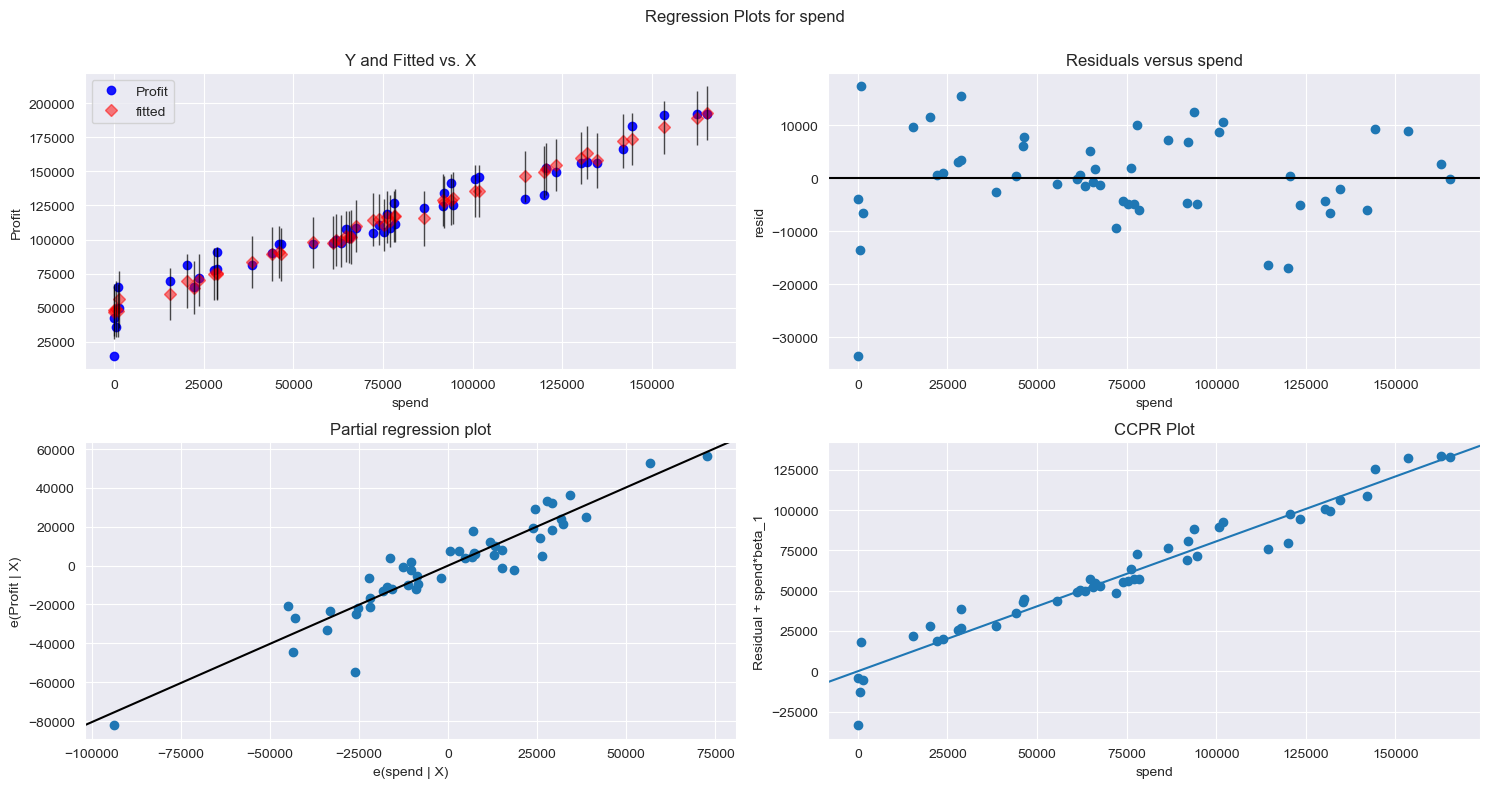

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'spend',fig=fig)
plt.show()

eval_env: 1


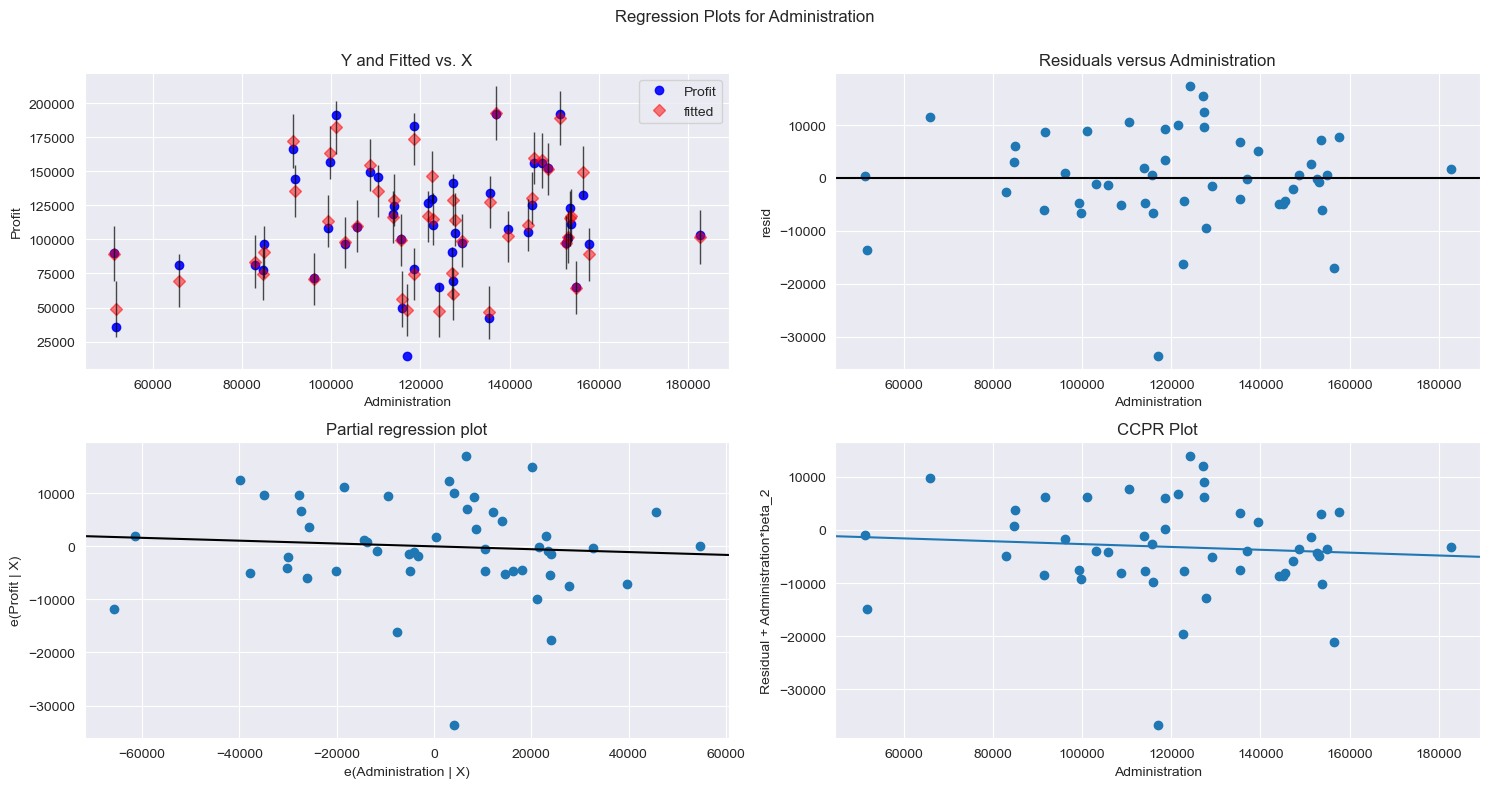

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


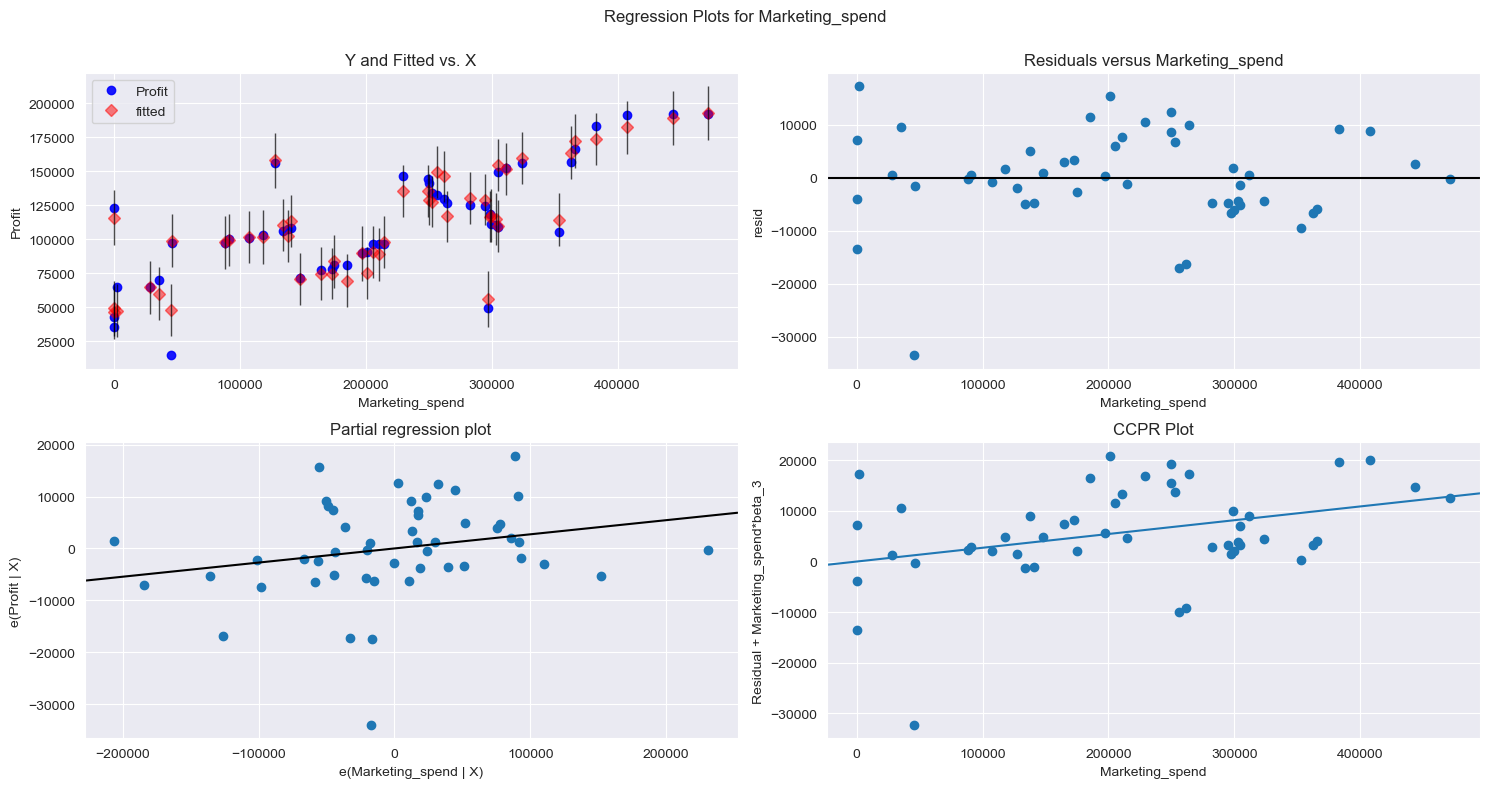

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_spend',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [42]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

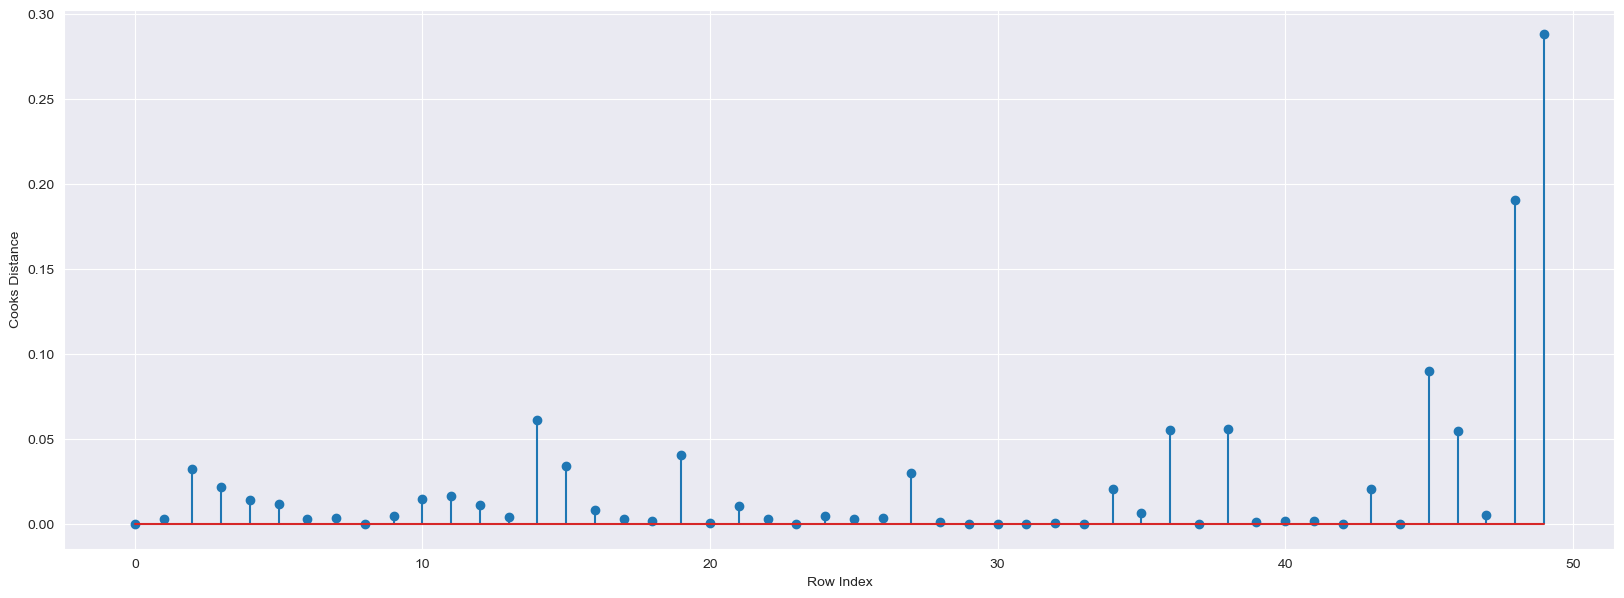

In [43]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

In [45]:
from statsmodels.graphics.regressionplots import influence_plot

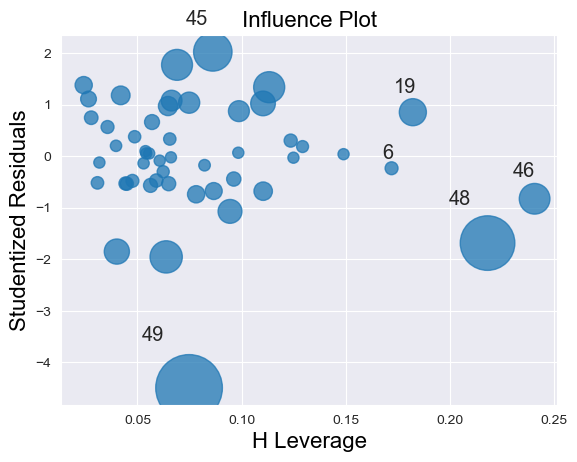

In [46]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [47]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [49]:
data[data.index.isin([49])] 

,spend,Administration,Marketing_spend,Profit
49,0.0,116983.8,45173.06,14681.4


# Improving the model

In [50]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data2

,spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Model deletion diagonstics and final model

In [52]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~spend+Administration+Marketing_spend",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~spend+Administration+Marketing_spend",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [53]:
final_model.rsquared

0.9613162435129847

In [54]:
data2

,spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Model predictions

In [55]:
#New data for prediction is
new_data=pd.DataFrame({'spend':70000,"Administration":90000,"Marketing_spend":140000},index=[0])
new_data

,spend,Administration,Marketing_spend
0,70000,90000,140000


In [56]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [57]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# table containing R squared value for each prepared model

In [58]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
